<h2>Nettoyage des données inutilisables</h2>

In [15]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras import layers
from keras.models import Sequential, Model

In [16]:
df = pd.read_excel('/kaggle/input/private/Bdd_Bloc.xlsx')
pd.options.display.max_columns = 33
pd.options.display.max_rows = 50

#renomme les colonnes  
df.columns = ['NoCas', 'DateEntry', 'DateExit', 'DateBirth', 'Sex',
       'CIMDiagPr', 'CimAssoc1', 'CimAssoc2', 'CimAssoc3',
       'CimAssoc4', 'CimAssoc5', 'CCAM1', 'CCAM2', 'CCAM3', 'CCAM4',
       'GHMCode', 'Colonne2', 'Colonne1', 'Molon', 'Anesthesiste',
       'Chirurgien', 'Year', 'IDPatient', 'DateInter', 'NomPatient',
       'HourEntrySSPI',
       'HourEntryBLOC', 'HourIncision ',
       'HourExitBLOC', 'AnesthType',
       'AnesthLoco_reg', 'TimeHospit', 'Interv']

#on enlève les colonnes inutiles 
df = df.drop(columns=['Colonne2', 'Colonne1', 'Molon', 'NomPatient'])
df.shape
df

,NoCas,DateEntry,DateExit,DateBirth,Sex,CIMDiagPr,CimAssoc1,CimAssoc2,CimAssoc3,CimAssoc4,CimAssoc5,CCAM1,CCAM2,CCAM3,CCAM4,GHMCode,Anesthesiste,Chirurgien,Year,IDPatient,DateInter,HourEntrySSPI,HourEntryBLOC,HourIncision,HourExitBLOC,AnesthType,AnesthLoco_reg,TimeHospit,Interv
0,1680579,2019-01-04,2019-01-04,1956-07-28,1,I83.9,NaN,NaN,NaN,NaN,NaN,EJSA001,EJFA002,NaN,NaN,05C17J,OU,PI,2019,45133,2019-01-04,13:54:00,13:55:00,00:00:00,15:05:00,AG ventilation spontanée/lunettes O2,NaN,1,Varices
1,1680210,2019-01-07,2019-01-07,1938-08-08,2,I83.9,E07.9,E75.6,NaN,NaN,NaN,EJSA001,EJFA002,NaN,NaN,05C17J,OU,PI,2019,119819,2019-01-07,07:54:00,07:54:00,08:12:00,08:28:00,AG ventilation spontanée/lunettes O2,NaN,1,Varices
2,1680050,2019-01-07,2019-01-07,1993-07-10,2,I83.9,G43.8,NaN,NaN,NaN,NaN,EJFA002,EJSA001,NaN,NaN,05C17J,BO,PI,2019,119783,2019-01-07,08:20:00,08:38:00,08:53:00,09:25:00,AG ventilation spontanée/lunettes O2,NaN,1,Varices
3,1680580,2019-01-07,2019-01-07,1956-07-28,1,I83.9,NaN,NaN,NaN,NaN,NaN,EJSA001,EJFA002,NaN,NaN,05C17J,BO,PI,2019,45133,2019-01-07,09:21:00,09:40:00,09:56:00,10:39:00,AG ventilation spontanée/lunettes O2,NaN,1,Varices
4,1678286,2019-01-04,2019-01-04,1961-09-20,2,M20.1,F17.25,F41.8,R00.2,NaN,NaN,NDPA002,NJPA029,YYYY012,AHQJ021,08C37J,OU,OV,2019,91238,2019-01-04,13:22:00,14:13:00,14:29:00,15:10:00,AG ventilation spontanée/lunettes O2,Bloc Pied,1,Pied Complexe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14644,1878975,2022-11-17,2022-11-18,1963-07-31,2,M75.1,M75.2,NaN,NaN,NaN,NaN,MJDC001,MEMC003,AHQJ021,NaN,08C581,BO,DO,2022,136517,2022-11-17,09:46:00,10:35:00,10:58:00,12:00:00,AG avec masque laryngé,Bloc Inter-scalénique,2,Arthroscopie Epaule Complexe
14645,1885187,2022-12-07,2022-12-09,1972-12-04,1,S92.00,M65.87,NaN,NaN,NaN,NaN,NDCA004,NJPA018,YYYY012,AHQJ021,08C551,BO,CA,2022,151979,2022-12-07,14:07:00,14:37:00,14:55:00,16:06:00,AG avec masque laryngé,Bi Bloc sciatique + fémoral,3,Osteosynthese Membre Inferieur
14646,1857695,2022-11-17,2022-11-18,1966-06-06,1,M84.13,M65.83,F17.25,F10.26,F41.8,NaN,MJFA018,MCPA013,MDQK001,YYYY188,08C391,OU,MA,2022,147060,2022-11-17,07:22:00,00:00:00,08:38:00,00:00:00,AG avec intubation,Bloc Axillaire,2,Main Complexe
14647,1881099,2022-11-04,2022-11-05,1983-04-19,2,M23.51,NaN,NaN,NaN,NaN,NaN,NFMC003,NFEC002,AHQJ021,NFQK001,08C341,OU,CA,2022,40361,2022-11-04,10:57:00,11:30:00,11:59:00,13:01:00,AG avec masque laryngé,Bi Bloc sciatique + fémoral,2,Ligamentoplastie Genou + Arthroscopie


In [17]:
#on enlève les opérations esseulées (mal renseignées par les médecins) 
df = df.groupby('Interv').filter(lambda x : len(x)>8)
#et celle dont le chir n'est pas renseigné 
df = df.dropna(subset = ['Chirurgien', 'Interv']).reset_index(drop=True)
df.shape
df

,NoCas,DateEntry,DateExit,DateBirth,Sex,CIMDiagPr,CimAssoc1,CimAssoc2,CimAssoc3,CimAssoc4,CimAssoc5,CCAM1,CCAM2,CCAM3,CCAM4,GHMCode,Anesthesiste,Chirurgien,Year,IDPatient,DateInter,HourEntrySSPI,HourEntryBLOC,HourIncision,HourExitBLOC,AnesthType,AnesthLoco_reg,TimeHospit,Interv
0,1680579,2019-01-04,2019-01-04,1956-07-28,1,I83.9,NaN,NaN,NaN,NaN,NaN,EJSA001,EJFA002,NaN,NaN,05C17J,OU,PI,2019,45133,2019-01-04,13:54:00,13:55:00,00:00:00,15:05:00,AG ventilation spontanée/lunettes O2,NaN,1,Varices
1,1680210,2019-01-07,2019-01-07,1938-08-08,2,I83.9,E07.9,E75.6,NaN,NaN,NaN,EJSA001,EJFA002,NaN,NaN,05C17J,OU,PI,2019,119819,2019-01-07,07:54:00,07:54:00,08:12:00,08:28:00,AG ventilation spontanée/lunettes O2,NaN,1,Varices
2,1680050,2019-01-07,2019-01-07,1993-07-10,2,I83.9,G43.8,NaN,NaN,NaN,NaN,EJFA002,EJSA001,NaN,NaN,05C17J,BO,PI,2019,119783,2019-01-07,08:20:00,08:38:00,08:53:00,09:25:00,AG ventilation spontanée/lunettes O2,NaN,1,Varices
3,1680580,2019-01-07,2019-01-07,1956-07-28,1,I83.9,NaN,NaN,NaN,NaN,NaN,EJSA001,EJFA002,NaN,NaN,05C17J,BO,PI,2019,45133,2019-01-07,09:21:00,09:40:00,09:56:00,10:39:00,AG ventilation spontanée/lunettes O2,NaN,1,Varices
4,1678286,2019-01-04,2019-01-04,1961-09-20,2,M20.1,F17.25,F41.8,R00.2,NaN,NaN,NDPA002,NJPA029,YYYY012,AHQJ021,08C37J,OU,OV,2019,91238,2019-01-04,13:22:00,14:13:00,14:29:00,15:10:00,AG ventilation spontanée/lunettes O2,Bloc Pied,1,Pied Complexe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,1878975,2022-11-17,2022-11-18,1963-07-31,2,M75.1,M75.2,NaN,NaN,NaN,NaN,MJDC001,MEMC003,AHQJ021,NaN,08C581,BO,DO,2022,136517,2022-11-17,09:46:00,10:35:00,10:58:00,12:00:00,AG avec masque laryngé,Bloc Inter-scalénique,2,Arthroscopie Epaule Complexe
12972,1885187,2022-12-07,2022-12-09,1972-12-04,1,S92.00,M65.87,NaN,NaN,NaN,NaN,NDCA004,NJPA018,YYYY012,AHQJ021,08C551,BO,CA,2022,151979,2022-12-07,14:07:00,14:37:00,14:55:00,16:06:00,AG avec masque laryngé,Bi Bloc sciatique + fémoral,3,Osteosynthese Membre Inferieur
12973,1857695,2022-11-17,2022-11-18,1966-06-06,1,M84.13,M65.83,F17.25,F10.26,F41.8,NaN,MJFA018,MCPA013,MDQK001,YYYY188,08C391,OU,MA,2022,147060,2022-11-17,07:22:00,00:00:00,08:38:00,00:00:00,AG avec intubation,Bloc Axillaire,2,Main Complexe
12974,1881099,2022-11-04,2022-11-05,1983-04-19,2,M23.51,NaN,NaN,NaN,NaN,NaN,NFMC003,NFEC002,AHQJ021,NFQK001,08C341,OU,CA,2022,40361,2022-11-04,10:57:00,11:30:00,11:59:00,13:01:00,AG avec masque laryngé,Bi Bloc sciatique + fémoral,2,Ligamentoplastie Genou + Arthroscopie


In [18]:
#Création d'une colonne du temps au bloc 
IntervTime = []
for i in range (len(df)): 
    dtExit = df["HourExitBLOC"].iloc[i]
    dtEntry = df["HourEntryBLOC"].iloc[i]
    intervTime = dtExit.hour-dtEntry.hour + (dtExit.minute-dtEntry.minute)/60
    IntervTime.append(intervTime)

df.insert(25, "IntervTime", IntervTime)

#on enlève les interventions de temps nul
df = df.drop(df[(df["IntervTime"]==0)].index).reset_index(drop=True)
df.shape
df

,NoCas,DateEntry,DateExit,DateBirth,Sex,CIMDiagPr,CimAssoc1,CimAssoc2,CimAssoc3,CimAssoc4,CimAssoc5,CCAM1,CCAM2,CCAM3,CCAM4,GHMCode,Anesthesiste,Chirurgien,Year,IDPatient,DateInter,HourEntrySSPI,HourEntryBLOC,HourIncision,HourExitBLOC,IntervTime,AnesthType,AnesthLoco_reg,TimeHospit,Interv
0,1680579,2019-01-04,2019-01-04,1956-07-28,1,I83.9,NaN,NaN,NaN,NaN,NaN,EJSA001,EJFA002,NaN,NaN,05C17J,OU,PI,2019,45133,2019-01-04,13:54:00,13:55:00,00:00:00,15:05:00,1.166667,AG ventilation spontanée/lunettes O2,NaN,1,Varices
1,1680210,2019-01-07,2019-01-07,1938-08-08,2,I83.9,E07.9,E75.6,NaN,NaN,NaN,EJSA001,EJFA002,NaN,NaN,05C17J,OU,PI,2019,119819,2019-01-07,07:54:00,07:54:00,08:12:00,08:28:00,0.566667,AG ventilation spontanée/lunettes O2,NaN,1,Varices
2,1680050,2019-01-07,2019-01-07,1993-07-10,2,I83.9,G43.8,NaN,NaN,NaN,NaN,EJFA002,EJSA001,NaN,NaN,05C17J,BO,PI,2019,119783,2019-01-07,08:20:00,08:38:00,08:53:00,09:25:00,0.783333,AG ventilation spontanée/lunettes O2,NaN,1,Varices
3,1680580,2019-01-07,2019-01-07,1956-07-28,1,I83.9,NaN,NaN,NaN,NaN,NaN,EJSA001,EJFA002,NaN,NaN,05C17J,BO,PI,2019,45133,2019-01-07,09:21:00,09:40:00,09:56:00,10:39:00,0.983333,AG ventilation spontanée/lunettes O2,NaN,1,Varices
4,1678286,2019-01-04,2019-01-04,1961-09-20,2,M20.1,F17.25,F41.8,R00.2,NaN,NaN,NDPA002,NJPA029,YYYY012,AHQJ021,08C37J,OU,OV,2019,91238,2019-01-04,13:22:00,14:13:00,14:29:00,15:10:00,0.950000,AG ventilation spontanée/lunettes O2,Bloc Pied,1,Pied Complexe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12908,1880174,2022-10-27,2022-11-02,1945-01-05,2,T84.0,J45.0,G20,D64.8,NaN,NaN,NBEP001,NAQK015,NEKA003,AHQJ021,08C222,MA,JA,2022,25349,2022-10-28,13:29:00,13:50:00,14:19:00,16:13:00,2.383333,AG avec intubation,Bloc Lombaire,6,Prothese Totale Hanche
12909,1878975,2022-11-17,2022-11-18,1963-07-31,2,M75.1,M75.2,NaN,NaN,NaN,NaN,MJDC001,MEMC003,AHQJ021,NaN,08C581,BO,DO,2022,136517,2022-11-17,09:46:00,10:35:00,10:58:00,12:00:00,1.416667,AG avec masque laryngé,Bloc Inter-scalénique,2,Arthroscopie Epaule Complexe
12910,1885187,2022-12-07,2022-12-09,1972-12-04,1,S92.00,M65.87,NaN,NaN,NaN,NaN,NDCA004,NJPA018,YYYY012,AHQJ021,08C551,BO,CA,2022,151979,2022-12-07,14:07:00,14:37:00,14:55:00,16:06:00,1.483333,AG avec masque laryngé,Bi Bloc sciatique + fémoral,3,Osteosynthese Membre Inferieur
12911,1881099,2022-11-04,2022-11-05,1983-04-19,2,M23.51,NaN,NaN,NaN,NaN,NaN,NFMC003,NFEC002,AHQJ021,NFQK001,08C341,OU,CA,2022,40361,2022-11-04,10:57:00,11:30:00,11:59:00,13:01:00,1.516667,AG avec masque laryngé,Bi Bloc sciatique + fémoral,2,Ligamentoplastie Genou + Arthroscopie


In [19]:
#Création d'une colonne de temps en SSPI d'entrée 

TimeSSPI = []
for i in range (len(df)): 
        dtSSPI = df["HourEntrySSPI"].iloc[i]
        dtBLOC = df["HourEntryBLOC"].iloc[i]
        sspiTime = dtBLOC.hour-dtSSPI.hour + (dtBLOC.minute-dtSSPI.minute)/60
        if sspiTime == 0 : 
                sspiTime = np.nan
        TimeSSPI.append(sspiTime)

#df.insert(25,"SSPITime", TimeSSPI)
        
df.shape
df

,NoCas,DateEntry,DateExit,DateBirth,Sex,CIMDiagPr,CimAssoc1,CimAssoc2,CimAssoc3,CimAssoc4,CimAssoc5,CCAM1,CCAM2,CCAM3,CCAM4,GHMCode,Anesthesiste,Chirurgien,Year,IDPatient,DateInter,HourEntrySSPI,HourEntryBLOC,HourIncision,HourExitBLOC,IntervTime,AnesthType,AnesthLoco_reg,TimeHospit,Interv
0,1680579,2019-01-04,2019-01-04,1956-07-28,1,I83.9,NaN,NaN,NaN,NaN,NaN,EJSA001,EJFA002,NaN,NaN,05C17J,OU,PI,2019,45133,2019-01-04,13:54:00,13:55:00,00:00:00,15:05:00,1.166667,AG ventilation spontanée/lunettes O2,NaN,1,Varices
1,1680210,2019-01-07,2019-01-07,1938-08-08,2,I83.9,E07.9,E75.6,NaN,NaN,NaN,EJSA001,EJFA002,NaN,NaN,05C17J,OU,PI,2019,119819,2019-01-07,07:54:00,07:54:00,08:12:00,08:28:00,0.566667,AG ventilation spontanée/lunettes O2,NaN,1,Varices
2,1680050,2019-01-07,2019-01-07,1993-07-10,2,I83.9,G43.8,NaN,NaN,NaN,NaN,EJFA002,EJSA001,NaN,NaN,05C17J,BO,PI,2019,119783,2019-01-07,08:20:00,08:38:00,08:53:00,09:25:00,0.783333,AG ventilation spontanée/lunettes O2,NaN,1,Varices
3,1680580,2019-01-07,2019-01-07,1956-07-28,1,I83.9,NaN,NaN,NaN,NaN,NaN,EJSA001,EJFA002,NaN,NaN,05C17J,BO,PI,2019,45133,2019-01-07,09:21:00,09:40:00,09:56:00,10:39:00,0.983333,AG ventilation spontanée/lunettes O2,NaN,1,Varices
4,1678286,2019-01-04,2019-01-04,1961-09-20,2,M20.1,F17.25,F41.8,R00.2,NaN,NaN,NDPA002,NJPA029,YYYY012,AHQJ021,08C37J,OU,OV,2019,91238,2019-01-04,13:22:00,14:13:00,14:29:00,15:10:00,0.950000,AG ventilation spontanée/lunettes O2,Bloc Pied,1,Pied Complexe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12908,1880174,2022-10-27,2022-11-02,1945-01-05,2,T84.0,J45.0,G20,D64.8,NaN,NaN,NBEP001,NAQK015,NEKA003,AHQJ021,08C222,MA,JA,2022,25349,2022-10-28,13:29:00,13:50:00,14:19:00,16:13:00,2.383333,AG avec intubation,Bloc Lombaire,6,Prothese Totale Hanche
12909,1878975,2022-11-17,2022-11-18,1963-07-31,2,M75.1,M75.2,NaN,NaN,NaN,NaN,MJDC001,MEMC003,AHQJ021,NaN,08C581,BO,DO,2022,136517,2022-11-17,09:46:00,10:35:00,10:58:00,12:00:00,1.416667,AG avec masque laryngé,Bloc Inter-scalénique,2,Arthroscopie Epaule Complexe
12910,1885187,2022-12-07,2022-12-09,1972-12-04,1,S92.00,M65.87,NaN,NaN,NaN,NaN,NDCA004,NJPA018,YYYY012,AHQJ021,08C551,BO,CA,2022,151979,2022-12-07,14:07:00,14:37:00,14:55:00,16:06:00,1.483333,AG avec masque laryngé,Bi Bloc sciatique + fémoral,3,Osteosynthese Membre Inferieur
12911,1881099,2022-11-04,2022-11-05,1983-04-19,2,M23.51,NaN,NaN,NaN,NaN,NaN,NFMC003,NFEC002,AHQJ021,NFQK001,08C341,OU,CA,2022,40361,2022-11-04,10:57:00,11:30:00,11:59:00,13:01:00,1.516667,AG avec masque laryngé,Bi Bloc sciatique + fémoral,2,Ligamentoplastie Genou + Arthroscopie


In [20]:
#Création d'une colonne age

ages = []
year = datetime.now().year
for i in range (len(df)): 
    age = int((df["DateEntry"].iloc[i]-df["DateBirth"].iloc[i]).days / 365.25)
    if age == 0 : 
        age = np.nan
    ages.append(age)

df.insert(4,"Age", ages)
        
df.shape
df

,NoCas,DateEntry,DateExit,DateBirth,Age,Sex,CIMDiagPr,CimAssoc1,CimAssoc2,CimAssoc3,CimAssoc4,CimAssoc5,CCAM1,CCAM2,CCAM3,CCAM4,GHMCode,Anesthesiste,Chirurgien,Year,IDPatient,DateInter,HourEntrySSPI,HourEntryBLOC,HourIncision,HourExitBLOC,IntervTime,AnesthType,AnesthLoco_reg,TimeHospit,Interv
0,1680579,2019-01-04,2019-01-04,1956-07-28,62,1,I83.9,NaN,NaN,NaN,NaN,NaN,EJSA001,EJFA002,NaN,NaN,05C17J,OU,PI,2019,45133,2019-01-04,13:54:00,13:55:00,00:00:00,15:05:00,1.166667,AG ventilation spontanée/lunettes O2,NaN,1,Varices
1,1680210,2019-01-07,2019-01-07,1938-08-08,80,2,I83.9,E07.9,E75.6,NaN,NaN,NaN,EJSA001,EJFA002,NaN,NaN,05C17J,OU,PI,2019,119819,2019-01-07,07:54:00,07:54:00,08:12:00,08:28:00,0.566667,AG ventilation spontanée/lunettes O2,NaN,1,Varices
2,1680050,2019-01-07,2019-01-07,1993-07-10,25,2,I83.9,G43.8,NaN,NaN,NaN,NaN,EJFA002,EJSA001,NaN,NaN,05C17J,BO,PI,2019,119783,2019-01-07,08:20:00,08:38:00,08:53:00,09:25:00,0.783333,AG ventilation spontanée/lunettes O2,NaN,1,Varices
3,1680580,2019-01-07,2019-01-07,1956-07-28,62,1,I83.9,NaN,NaN,NaN,NaN,NaN,EJSA001,EJFA002,NaN,NaN,05C17J,BO,PI,2019,45133,2019-01-07,09:21:00,09:40:00,09:56:00,10:39:00,0.983333,AG ventilation spontanée/lunettes O2,NaN,1,Varices
4,1678286,2019-01-04,2019-01-04,1961-09-20,57,2,M20.1,F17.25,F41.8,R00.2,NaN,NaN,NDPA002,NJPA029,YYYY012,AHQJ021,08C37J,OU,OV,2019,91238,2019-01-04,13:22:00,14:13:00,14:29:00,15:10:00,0.950000,AG ventilation spontanée/lunettes O2,Bloc Pied,1,Pied Complexe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12908,1880174,2022-10-27,2022-11-02,1945-01-05,77,2,T84.0,J45.0,G20,D64.8,NaN,NaN,NBEP001,NAQK015,NEKA003,AHQJ021,08C222,MA,JA,2022,25349,2022-10-28,13:29:00,13:50:00,14:19:00,16:13:00,2.383333,AG avec intubation,Bloc Lombaire,6,Prothese Totale Hanche
12909,1878975,2022-11-17,2022-11-18,1963-07-31,59,2,M75.1,M75.2,NaN,NaN,NaN,NaN,MJDC001,MEMC003,AHQJ021,NaN,08C581,BO,DO,2022,136517,2022-11-17,09:46:00,10:35:00,10:58:00,12:00:00,1.416667,AG avec masque laryngé,Bloc Inter-scalénique,2,Arthroscopie Epaule Complexe
12910,1885187,2022-12-07,2022-12-09,1972-12-04,50,1,S92.00,M65.87,NaN,NaN,NaN,NaN,NDCA004,NJPA018,YYYY012,AHQJ021,08C551,BO,CA,2022,151979,2022-12-07,14:07:00,14:37:00,14:55:00,16:06:00,1.483333,AG avec masque laryngé,Bi Bloc sciatique + fémoral,3,Osteosynthese Membre Inferieur
12911,1881099,2022-11-04,2022-11-05,1983-04-19,39,2,M23.51,NaN,NaN,NaN,NaN,NaN,NFMC003,NFEC002,AHQJ021,NFQK001,08C341,OU,CA,2022,40361,2022-11-04,10:57:00,11:30:00,11:59:00,13:01:00,1.516667,AG avec masque laryngé,Bi Bloc sciatique + fémoral,2,Ligamentoplastie Genou + Arthroscopie


Prendre seulement les colonnes "Age", "CIMDiagPR", "CCAM1", "Chirurgien", "Interv", /// 'IntervTime" pour l'entrainement

In [21]:
data = df[['Age', 'CIMDiagPr', 'CCAM1', 'Chirurgien', 'IntervTime']]
data

,Age,CIMDiagPr,CCAM1,Chirurgien,IntervTime
0,62,I83.9,EJSA001,PI,1.166667
1,80,I83.9,EJSA001,PI,0.566667
2,25,I83.9,EJFA002,PI,0.783333
3,62,I83.9,EJSA001,PI,0.983333
4,57,M20.1,NDPA002,OV,0.950000
...,...,...,...,...,...
12908,77,T84.0,NBEP001,JA,2.383333
12909,59,M75.1,MJDC001,DO,1.416667
12910,50,S92.00,NDCA004,CA,1.483333
12911,39,M23.51,NFMC003,CA,1.516667


In [22]:
le = LabelEncoder()
codeCIM = le.fit_transform(data['CIMDiagPr'])
codeCCAM = le.fit_transform(data['CCAM1'])
codeChir = le.fit_transform(data['Chirurgien'])

data.insert(2, "CIMDiagPr_code", codeCIM)
data.insert(4, "CCAM1_code", codeCCAM)
data.insert(6, "Chirurgien_code", codeChir)

data

,Age,CIMDiagPr,CIMDiagPr_code,CCAM1,CCAM1_code,Chirurgien,Chirurgien_code,IntervTime
0,62,I83.9,46,EJSA001,32,PI,16,1.166667
1,80,I83.9,46,EJSA001,32,PI,16,0.566667
2,25,I83.9,46,EJFA002,29,PI,16,0.783333
3,62,I83.9,46,EJSA001,32,PI,16,0.983333
4,57,M20.1,115,NDPA002,284,OV,15,0.950000
...,...,...,...,...,...,...,...,...
12908,77,T84.0,464,NBEP001,230,JA,9,2.383333
12909,59,M75.1,257,MJDC001,180,DO,3,1.416667
12910,50,S92.00,442,NDCA004,269,CA,1,1.483333
12911,39,M23.51,161,NFMC003,341,CA,1,1.516667


<Axes: >

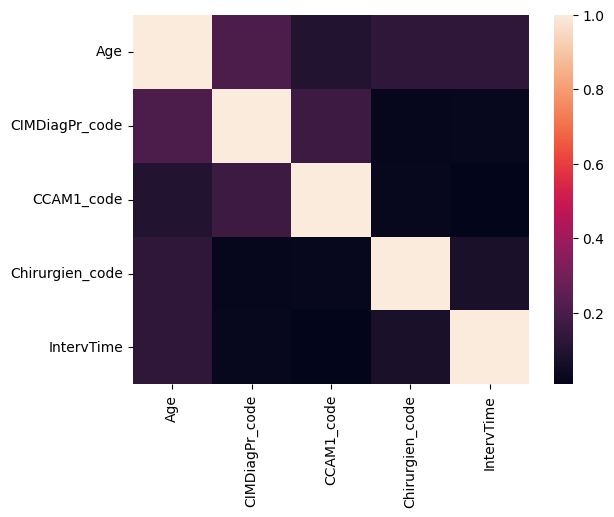

In [23]:
sns.heatmap(abs(data[['Age', 'CIMDiagPr_code', 'CCAM1_code', 'Chirurgien_code', 'IntervTime']].corr()))

On se rend compte qu'il y a très peu de corrélation entre le temps d'intervention et ces paramètres, mais ce sont les paramètres recommandés par le client.

In [49]:
age_mean = np.mean(data["Age"])
age_std = np.std(data["Age"])
CIM_mean = np.mean(data["CIMDiagPr_code"])
CIM_std = np.std(data["CIMDiagPr_code"])
CCAM_mean = np.mean(data["CCAM1_code"])
CCAM_std = np.std(data["CCAM1_code"])
chir_mean = np.mean(data["Chirurgien_code"])
chir_std = np.std(data["Chirurgien_code"])

In [57]:
X=np.array([[(data["Age"].iloc[i]-age_mean)/age_std, (data["CIMDiagPr_code"].iloc[i]-CIM_mean)/CIM_std, (data["CCAM1_code"].iloc[i] - CCAM_mean)/CCAM_std, (data["Chirurgien_code"].iloc[i] - chir_mean)/chir_std] for i in range(len(data))])
Y=np.array([round(data["IntervTime"].iloc[i],1) for i in range(len(data))])
print(Y)

[1.2 0.6 0.8 ... 1.5 1.5 2.1]


In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

[1.6 0.9 1.5 ... 1.4 0.5 1.4]


In [98]:
# Architecture du modèle
model = Sequential([
    layers.Dense(4, activation='relu', input_dim=4),
    layers.Dense(32, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

print("lancement de la compilation")

model.summary()

# Compilation
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

print("lancement Entrainement")

# Entraînement
model.fit(X_train, Y_train, epochs=10, batch_size=32)

print("lancement Evaluation")
# Évaluation sur les données de test
test_loss, test_acc = model.evaluate(np.array(X_test), np.array(Y_test))
print('Précision sur les données d\'evaluation :', test_acc)

lancement de la compilation
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 4)                 20        
                                                                 
 dense_66 (Dense)            (None, 32)                160       
                                                                 
 dense_67 (Dense)            (None, 128)               4224      
                                                                 
 dense_68 (Dense)            (None, 32)                4128      
                                                                 
 dense_69 (Dense)            (None, 16)                528       
                                                                 
 dense_70 (Dense)            (None, 1)                 17        
                                                                 
Total params: 9,077
Train

La précision laisse vraiment à désirer d'après l'accuracy mais c'est normal, il est très dur de prédire exactement le temps d'intervention. Voyons s'il est loin à chaque fois. 

In [99]:
predictions = model.predict(X_test)
predictions = [round(i[0],1) for i in predictions]

81/81 [==============================] - 0s 1ms/step


In [100]:
diff = abs(Y_test - predictions)
print(diff)

[0.10000005 0.30000005 0.29999995 ... 0.1        0.89999998 0.19999995]


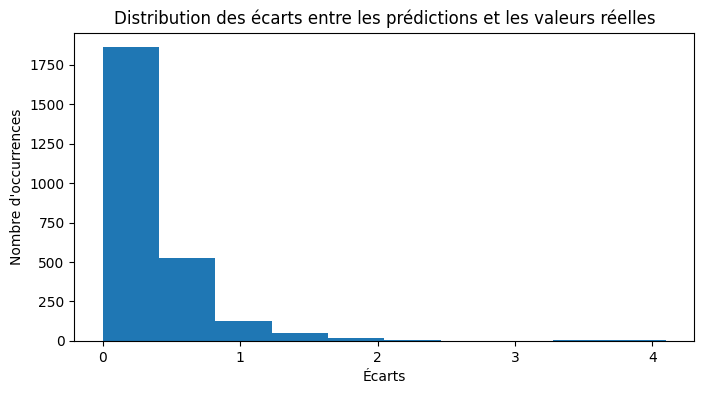

In [101]:
plt.figure(figsize=(8, 4))
plt.hist(diff, bins=10)
plt.title('Distribution des écarts entre les prédictions et les valeurs réelles')
plt.xlabel('Écarts')
plt.ylabel('Nombre d\'occurrences')
plt.show()

C'est pas hyper satisfaisant mais c'est correct.